In [1]:
# Required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../measurements.csv', encoding="utf-8", skipinitialspace=True)
df


,Zone,Datetime,Bandwidth,Upload Jitter,Download Jitter,Upload Packet Loss,Download Packet Loss,Upload Bit Rate (With TCP),Download Bit Rate (With TCP),Max Bit Rate (With TCP),One-Way Delay
0,europe-west1-b,Saturday 6 May 10:15,90.0 M,0.839,0.0,0.0,0,91.6 M,92.6 M,104.0 M,13.68
1,europe-west1-b,Saturday 6 May 12:37,92.0 M,0.767,0.0,0.0,0,92.3 M,92.6 M,104.0 M,14.30
2,europe-west1-b,Saturday 6 May 15:05,91.5 M,0.835,0.0,0.0,0,80.5 M,92.6 M,104.0 M,15.05
3,europe-west1-b,Saturday 6 May 17:45,92.0 M,0.784,0.0,0.0,0,93.3 M,92.6 M,104.0 M,51.12
4,europe-west1-b,Saturday 6 May 17:48,91.4 M,0.832,0.0,0.0,0,80.4 M,79.2 M,94.4 M,14.53
...,...,...,...,...,...,...,...,...,...,...,...
76,europe-west1-b,Wednesday 10 May 22:47,91.8 M,0.772,0.0,0.0,0,93.4 M,92.3 M,106.0 M,29.45
77,europe-west1-b,Wednesday 10 May 22:51,91.9 M,0.776,0.0,0.0,0,93.5 M,92.5 M,97.6 M,16.08
78,me-west1-a,Wednesday 10 May 22:55,89.4 M,0.780,0.0,0.0,0,91.0 M,89.7 M,103.0 M,45.90
79,me-west1-a,Wednesday 10 May 22:59,89.8 M,0.828,0.0,0.0,0,91.6 M,90.2 M,106.0 M,22.16


In [2]:
def parse_datetime(df):
    date_time_parts = df['Datetime'].str.split(' ')
    df['Week day'] = date_time_parts.str[0]
    df['Day'] = date_time_parts.str[1]
    df['Month'] = date_time_parts.str[2]
    time_parts = date_time_parts.str[3].str.split(':')
    df['Hour'] = time_parts.str[0]
    df['Minute'] = time_parts.str[1]

    df['Day'] = df['Day'].astype(str).astype(int)
    df['Hour'] = df['Hour'].astype(str).astype(int)
    df['Minute'] = df['Minute'].astype(str).astype(int)


parse_datetime(df)
df = df.drop("Datetime", axis=1)

In [3]:
variables_list = ["Bandwidth", "Upload Bit Rate (With UDP)", "Download Bit Rate (With UDP)",
                  "Max Bit Rate (With UDP)", "Upload Bit Rate (With TCP)",
                  "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)"]

#Converte as variáveis em "bits/sec"
def convert_variable(variables_list, df):
    scale = {'K': 10**3, 'M': 10**6, 'G': 10**9}
    for var in variables_list:
        if var in df.columns:
            col = df[var]
            num = col.str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)
            unit = col.str.extract(r'([KMG])', expand=False)
            if not unit.empty:
                unit = unit.map(scale)
                df[var] = num * unit



convert_variable(variables_list, df)



In [4]:
# Details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          81 non-null     object 
 1   Bandwidth                     81 non-null     float64
 2   Upload Jitter                 81 non-null     float64
 3   Download Jitter               81 non-null     float64
 4   Upload Packet Loss            81 non-null     float64
 5   Download Packet Loss          81 non-null     int64  
 6   Upload Bit Rate (With TCP)    81 non-null     float64
 7   Download Bit Rate (With TCP)  81 non-null     float64
 8   Max Bit Rate (With TCP)       81 non-null     float64
 9   One-Way Delay                 81 non-null     float64
 10  Week day                      81 non-null     object 
 11  Day                           81 non-null     int64  
 12  Month                         81 non-null     object 
 13  Hour   

AttributeError: 'Line2D' object has no property 'errorbar'

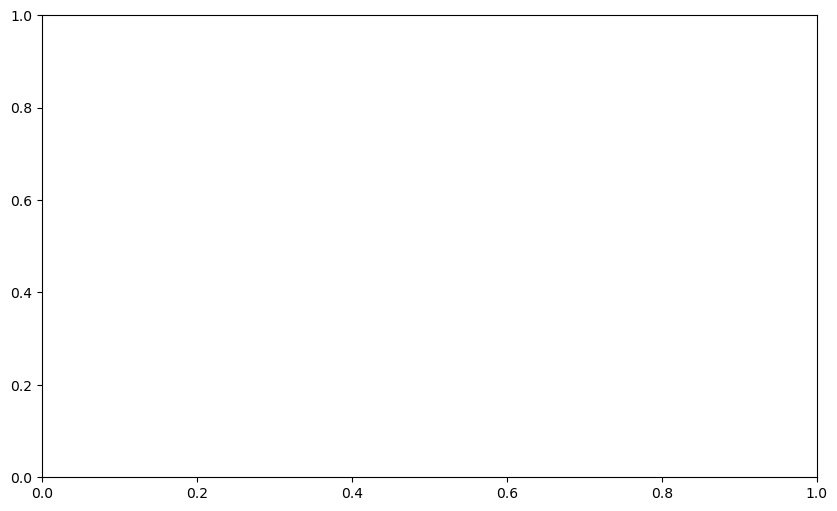

In [6]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Hour', y=col, data=df, hue='Zone', ax=ax, errorbar=None)
    ax.set_title(f"{col} over the day")
    ax.set_ylabel(col)
    ax.set_xlabel("Hour")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.savefig(f"{col}_24.png")
    plt.show()


AttributeError: 'Line2D' object has no property 'errorbar'

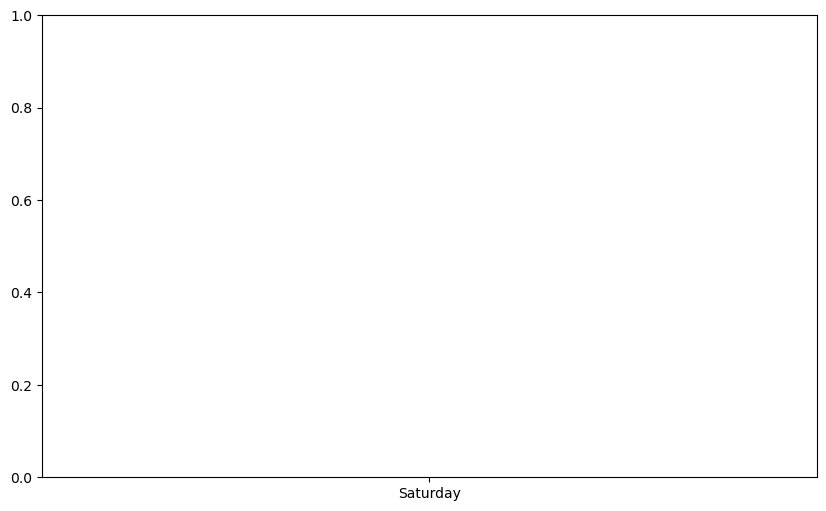

In [7]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Week day', y=col, data=df, hue='Zone', ax=ax, errorbar=None)
    ax.set_title(f"{col} over the week")
    ax.set_ylabel(col)
    ax.set_xlabel("Week")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.savefig(f"{col}_week.png")
    plt.show()
